In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


In [2]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("course_lead_scoring.csv")
df.isnull().sum()
df[["number_of_courses_viewed", "annual_income", "interaction_count", "lead_score"]].fillna(0.0, inplace=True)
df.annual_income.fillna(0.0, inplace=True)
df.lead_source.fillna("NA", inplace=True)
df.industry.fillna("NA", inplace=True)
df.employment_status.fillna("NA", inplace=True)
df.location.fillna("NA", inplace=True)
numerical = ["number_of_courses_viewed", "annual_income", "interaction_count", "lead_score"]
categorical = ['lead_source','industry', 'employment_status', 'location']

# first creates a split of 20/80 full/test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
# applying it a second time gives 60/20/20 split
# here we have to use 25% of the original 80% full_train
# to get the desired split. 20/80 = 25
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']
del df_full_train['converted']
dv = DictVectorizer(sparse=False) # false to comporessed matrix

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict) 
# equivalent to .fit & .transform

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
#also on validation data

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
    # solver='lbfgs' is the default solver in newer version of sklearn
    # for older versions, you need to specify it explicitly
model.fit(X_train, y_train)
model.intercept_[0]
model.coef_[0].round(3)

from sklearn.metrics import accuracy_score
model.predict(X_train)
y_pred = model.predict(X_val)

acc = (y_test == y_pred).mean()
print(acc, round(acc,2))
converted = (y_pred >= 0.50).astype(int)
print( ":", (y_val == converted).mean())

dicts_test = df_test[categorical +numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict(X_test)
acc = (y_test == y_pred).mean()
print(acc, round(acc,2))

0.6382252559726962 0.64
: 0.6996587030716723
0.726962457337884 0.73


In [3]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("course_lead_scoring.csv")
df.isnull().sum()
df[["number_of_courses_viewed", "annual_income", "interaction_count", "lead_score"]].fillna(0.0, inplace=True)
df.annual_income.fillna(0.0, inplace=True)
df.lead_source.fillna("NA", inplace=True)
df.industry.fillna("NA", inplace=True)
df.employment_status.fillna("NA", inplace=True)
df.location.fillna("NA", inplace=True)
numerical = ["number_of_courses_viewed", "annual_income", "interaction_count", "lead_score"]
categorical = ['lead_source','industry', 'employment_status', 'location']

# first creates a split of 20/80 full/test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
# applying it a second time gives 60/20/20 split
# here we have to use 25% of the original 80% full_train
# to get the desired split. 20/80 = 25
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']
del df_full_train['converted']
dv = DictVectorizer(sparse=False) # false to comporessed matrix

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict) 
# equivalent to .fit & .transform

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
#also on validation data

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
    # solver='lbfgs' is the default solver in newer version of sklearn
    # for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict_proba(X_val)[:, 1]

acc = (y_test == y_pred).mean()
print(acc, round(acc,2))
converted = (y_pred >= 0.50).astype(int)
print( ":", (y_val == converted).mean())

dicts_test = df_test[categorical +numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict(X_test)
acc = (y_test == y_pred).mean()
print(acc, round(acc,2))

0.0 0.0
: 0.6996587030716723
0.726962457337884 0.73


Question 1

In [4]:
for x in numerical:
    dicts_train = df_train[[x]].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts_train)
    model = LogisticRegression(solver='liblinear', C=.01, max_iter=1000, random_state=1)
    model.fit(X_train, y_train)

    dicts_val = df_val[[x]].to_dict(orient="records")
    X_val = dv.transform(dicts_val)
    y_pred = model.predict_proba(X_val)[:,1]



    acc = (y_val == y_pred).mean()
    print(x, acc)
    print(roc_auc_score(y_val, y_pred))
# number_of_courses_viewed

number_of_courses_viewed 0.0
0.7845445965077866
annual_income 0.0
0.5441481831052383
interaction_count 0.0
0.7376120811703634
lead_score 0.0
0.6413638508730533


Question 2

In [ ]:
import warnings
warnings.filterwarnings('ignore')

dv = DictVectorizer(sparse=False) # false to comporessed matrix

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict) 
# equivalent to .fit & .transform

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
#also on validation data

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
    # solver='lbfgs' is the default solver in newer version of sklearn
    # for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict_proba(X_val)[:, 1]
print(round(roc_auc_score(y_val, y_pred), 3))
# .855 (.92)

0.855


In [6]:
# Now let's compute precision and recall for our model.

# * Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
# * For each threshold, compute precision and recall
# * Plot them

# At which threshold precision and recall curves intersect?

# * 0.145
# * 0.345
# * 0.545
# * 0.745


# p = tp / (tp + fp)
# p

# r = tp / (tp + fn)
# r
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [7]:
tpr_fpr_dataframe(y_val, y_pred)

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,163,130,0,0,1.00000,1.0
1,0.01,163,130,0,0,1.00000,1.0
2,0.02,163,130,0,0,1.00000,1.0
3,0.03,163,130,0,0,1.00000,1.0
4,0.04,163,130,0,0,1.00000,1.0
...,...,...,...,...,...,...,...
96,0.96,4,0,159,130,0.02454,0.0
97,0.97,2,0,161,130,0.01227,0.0
98,0.98,0,0,163,130,0.00000,0.0
99,0.99,0,0,163,130,0.00000,0.0


Question 3

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_scores)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

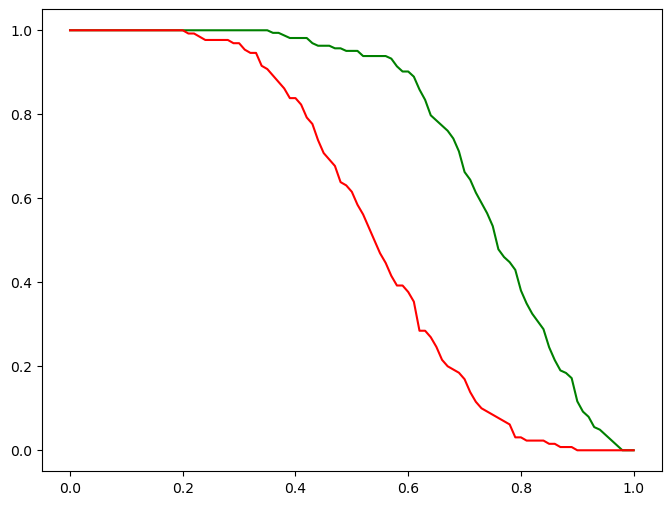

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='green')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='red')
plt.axvline(df_scores.threshold, color='gray', linestyle='--')
# * 0.145

 Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [21]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * (precision * tpr) / (precision + tpr) if (precision + tpr) > 0 else 0
        scores.append((t, tp, fp, fn, tn, tpr, fpr, f1))

        
columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'tpr', 'fpr', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)



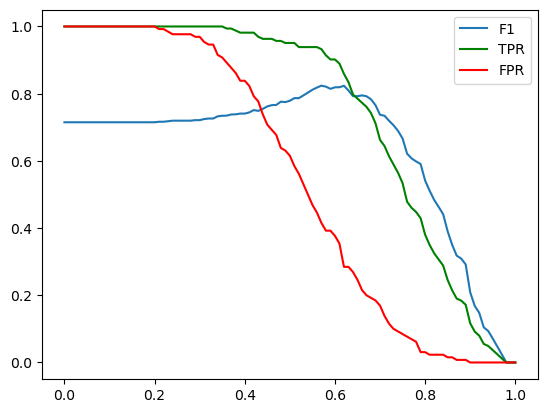

In [23]:
plt.plot(df_scores.threshold, df_scores['f1'], label='F1')
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='green')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='red')
plt.legend()
# .54

In [11]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

In [48]:
print(len(df_train))
print(len(y_train))

935
876


In [26]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [47]:
dv, model = train(df_train, y_train, C=0.001)

ValueError: Found input variables with inconsistent numbers of samples: [935, 876]

In [27]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [50]:
y_pred = predict(df_val, dv, model)

In [28]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("course_lead_scoring.csv")
df.isnull().sum()
df[["number_of_courses_viewed", "annual_income", "interaction_count", "lead_score"]].fillna(0.0, inplace=True)
df.annual_income.fillna(0.0, inplace=True)
df.lead_source.fillna("NA", inplace=True)
df.industry.fillna("NA", inplace=True)
df.employment_status.fillna("NA", inplace=True)
df.location.fillna("NA", inplace=True)
numerical = ["number_of_courses_viewed", "annual_income", "interaction_count", "lead_score"]
categorical = ['lead_source','industry', 'employment_status', 'location']

# first creates a split of 20/80 full/test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
# applying it a second time gives 60/20/20 split
# here we have to use 25% of the original 80% full_train
# to get the desired split. 20/80 = 25
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']
del df_full_train['converted']
dv = DictVectorizer(sparse=False) # false to comporessed matrix

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict) 
# equivalent to .fit & .transform

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
#also on validation data

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
    # solver='lbfgs' is the default solver in newer version of sklearn
    # for older versions, you need to specify it explicitly
model.fit(X_train, y_train)
model.intercept_[0]
model.coef_[0].round(3)

from sklearn.metrics import accuracy_score
model.predict(X_train)
y_pred = model.predict(X_val)

acc = (y_test == y_pred).mean()
print(acc, round(acc,2))
converted = (y_pred >= 0.50).astype(int)
print( ":", (y_val == converted).mean())

dicts_test = df_test[categorical +numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict(X_test)
acc = (y_test == y_pred).mean()
print(acc, round(acc,2))

0.6382252559726962 0.64
: 0.6996587030716723
0.726962457337884 0.73


In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assume df_full_train is your full training DataFrame
# and the target column is called 'churn' (adjust as needed)
C = 1.0
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    # Train model
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    # Predict probabilities for positive class
    y_pred = model.predict_proba(X_val)[:, 1]

    # Compute AUC
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print((C, scores), np.std(scores))


(1.0, [0.8549315714959888, 0.8549315714959888, 0.8549315714959888, 0.8549315714959888, 0.8549315714959888]) 1.1102230246251565e-16


In [38]:
for i, (train_idx, val_idx) in enumerate(kfold.split(df_full_train)):
    print(f"Fold {i+1}: Train size = {len(train_idx)}, Val size = {len(val_idx)}")

Fold 1: Train size = 935, Val size = 234
Fold 2: Train size = 935, Val size = 234
Fold 3: Train size = 935, Val size = 234
Fold 4: Train size = 935, Val size = 234
Fold 5: Train size = 936, Val size = 233


In [36]:
# ### Question 5: 5-Fold CV


# Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

# ```
# KFold(n_splits=5, shuffle=True, random_state=1)
# ```

# * Iterate over different folds of `df_full_train`
# * Split the data into train and validation
# * Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
# * Use AUC to evaluate the model on validation

# How large is standard deviation of the scores across different folds?

# - 0.0001
# - 0.006
# - 0.06
# - 0.36




kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]


        dv, model = train(df_train, y_train, C=1.0)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

ValueError: Found input variables with inconsistent numbers of samples: [935, 876]

Question 6

In [41]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for c in [[0.000001]]:
    for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]


            dv, model = train(df_train, y_train, C=.000001)
            y_pred = predict(df_val, dv, model)

            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

ValueError: Found input variables with inconsistent numbers of samples: [935, 876]

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw04
* If your answer doesn't match options exactly, select the closest one